In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.family': 'sans-serif',
         'text.usetex': True}

rcParams.update(params)

def boundary2(tot,r,g,d): # Calculate edge density fractions, from total cell density (tot)
    # and cell fractions, red(r), green(g), dark(d)
    
    rbound, gbound, dbound = [],[],[]
    for i in range(len(tot)):
        rdens, gdens, ddens = [], [], []
        for k in range(48):
            j = -1
            while tot[i][k][j] < 50:
                j -= 1
            rdens.append(np.mean([r[i][k][j - l - 1] for l in range(0,1)]))
            gdens.append(np.mean([g[i][k][j - l - 1] for l in range(0,1)]))
            ddens.append(np.mean([d[i][k][j - l - 1] for l in range(0,1)]))
        rbound.append(rdens)
        gbound.append(gdens)
        dbound.append(ddens)
    return np.array(rbound), np.array(gbound), np.array(dbound)

In [4]:
red_exp,yellow_exp,green_exp,dark_exp,rspan = np.load('../Data/data_12tissues_4species.npy',allow_pickle = True)
red = red_exp
green = yellow_exp + green_exp
dark = dark_exp

red = red[:-1]
green = green[:-1]
dark = dark[:-1]

In [5]:
delta_t = 2760/60/48
tmax = delta_t*48
texp = np.linspace(0,tmax,48)

tot = red + green + dark + 1e-28
frac_red = red/tot
frac_green = green/tot
frac_dark = dark/tot

bulk_frac_red = np.mean(frac_red[:,:,:2],axis = 2)
bulk_frac_green = np.mean(frac_green[:,:,:2],axis = 2)
bulk_frac_dark = np.mean(frac_dark[:,:,:2],axis = 2)

boundary_frac_red, boundary_frac_green, boundary_frac_dark = boundary2(tot,frac_red,frac_green,frac_dark)

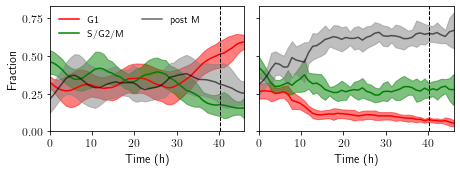

In [6]:
fig,ax2 = plt.subplots(1,2,figsize = (6.5,2.5))

ax2[0].fill_between(texp,np.mean(bulk_frac_red,axis = 0) - np.std(bulk_frac_red,axis = 0),np.mean(bulk_frac_red,axis = 0) + np.std(bulk_frac_red,axis = 0), color = 'red',alpha = 0.5)
ax2[0].fill_between(texp,np.mean(bulk_frac_green,axis = 0) - np.std(bulk_frac_green,axis = 0),np.mean(bulk_frac_green,axis = 0) + np.std(bulk_frac_green,axis = 0), color = 'green',alpha = 0.5)
ax2[0].fill_between(texp,np.mean(bulk_frac_dark,axis = 0) - np.std(bulk_frac_dark,axis = 0),np.mean(bulk_frac_dark,axis = 0) + np.std(bulk_frac_dark,axis = 0), color = 'gray',alpha = 0.5)
ax2[0].plot(texp,np.mean(bulk_frac_red,axis = 0), color = 'red',label = 'G1')
ax2[0].plot(texp,np.mean(bulk_frac_green,axis = 0), color = 'green',label = 'S/G2/M')
ax2[0].plot(texp,np.mean(bulk_frac_dark,axis = 0), color = 'black',alpha =.6,label = 'post M')

ax2[1].plot(texp,np.mean(boundary_frac_red,axis = 0), color = 'red')
ax2[1].fill_between(texp,np.mean(boundary_frac_red,axis = 0) - np.std(boundary_frac_red,axis = 0),np.mean(boundary_frac_red,axis = 0) + np.std(boundary_frac_red,axis = 0), color = 'red',alpha = 0.5)
ax2[1].plot(texp,np.mean(boundary_frac_green,axis = 0), color = 'green')
ax2[1].fill_between(texp,np.mean(boundary_frac_green,axis = 0) - np.std(boundary_frac_green,axis = 0),np.mean(boundary_frac_green,axis = 0) + np.std(boundary_frac_green,axis = 0), color = 'green',alpha = 0.5)
ax2[1].plot(texp,np.mean(boundary_frac_dark,axis = 0), color = 'black',alpha = .6)
ax2[1].fill_between(texp,np.mean(boundary_frac_dark,axis = 0) - np.std(boundary_frac_dark,axis = 0),np.mean(boundary_frac_dark,axis = 0) + np.std(boundary_frac_dark,axis = 0), color = 'gray',alpha = 0.5)

ax2[0].set_yticks([0,.25,.5,.75])
ax2[1].set_yticks([0,.25,.5,.75])

ax2[0].set_xlabel('Time (h)')
ax2[1].set_xlabel('Time (h)')
ax2[0].set_ylabel('Fraction')
ax2[0].set_ylim(0,.83)
ax2[1].set_ylim(0,.83)
ax2[1].set_yticklabels([])
ax2[0].set_xlim(0,texp[-1])
ax2[1].set_xlim(0,texp[-1])

ind_profile = 41

ax2[1].plot([texp[ind_profile],texp[ind_profile]],[0,1],lw = 1, color = 'black',linestyle = '--')
ax2[0].plot([texp[ind_profile],texp[ind_profile]],[0,1],lw = 1, color = 'black',linestyle = '--')
ax2[0].legend(frameon = False,ncol = 2)

plt.tight_layout()

#plt.savefig('TissueCenterEdge.pdf')
plt.show()